# Sentiment Analysis with an RNN

In this notebook, you'll implement a recurrent neural network that performs sentiment analysis. 
>Using an RNN rather than a strictly feedforward network is more accurate since we can include information about the *sequence* of words. 

Here we'll use a dataset of movie reviews, accompanied by sentiment labels: positive or negative.

<img src="assets/reviews_ex.png" width=40%>

### Network Architecture

The architecture for this network is shown below.

<img src="assets/network_diagram.png" width=40%>

>**First, we'll pass in words to an embedding layer.** We need an embedding layer because we have tens of thousands of words, so we'll need a more efficient representation for our input data than one-hot encoded vectors. You should have seen this before from the Word2Vec lesson. You can actually train an embedding with the Skip-gram Word2Vec model and use those embeddings as input, here. However, it's good enough to just have an embedding layer and let the network learn a different embedding table on its own. *In this case, the embedding layer is for dimensionality reduction, rather than for learning semantic representations.*

>**After input words are passed to an embedding layer, the new embeddings will be passed to LSTM cells.** The LSTM cells will add *recurrent* connections to the network and give us the ability to include information about the *sequence* of words in the movie review data. 

>**Finally, the LSTM outputs will go to a sigmoid output layer.** We're using a sigmoid function because positive and negative = 1 and 0, respectively, and a sigmoid will output predicted, sentiment values between 0-1. 

We don't care about the sigmoid outputs except for the **very last one**; we can ignore the rest. We'll calculate the loss by comparing the output at the last time step and the training label (pos or neg).

---
### Load in and visualize the data

In [1]:
import numpy as np

# read data from text files
with open('data/data2/reviews.txt', 'r') as f:
    reviews = f.read()
    
#with open('data/labels.txt', 'r') as f:
#    labels = f.read()

In [2]:
print(reviews[:2000])
print()

#please note that '\n' is also conunted as 1 char, therofre in output we get total 18 charcaters and 2 next lines.
#print(labels[:20])

So there is no way for me to plug it in here in the US unless I go by a converter.	0
Good case, Excellent value.	1
Great for the jawbone.	1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!	0
The mic is great.	1
I have to jiggle the plug to get it to line up right to get decent volume.	0
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.	0
If you are Razr owner...you must have this!	1
Needless to say, I wasted my money.	0
What a waste of money and time!.	0
And the sound quality is great.	1
He was very impressed when going from the original battery to the extended battery.	1
If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.	0
Very good quality though	1
The design is very odd, as the ear "clip" is not very comfortable at all.	0
Highly recommend for any one who has a blue tooth phone.	1
I advise EVERYONE DO NOT BE FOOLED!	0
So Far So G

## Data pre-processing

The first step when building a neural network model is getting your data into the proper form to feed into the network. Since we're using embedding layers, we'll need to encode each word with an integer. We'll also want to clean it up a bit.

You can see an example of the reviews data above. Here are the processing steps, we'll want to take:
>* We'll want to get rid of periods and extraneous punctuation.
* Also, you might notice that the reviews are delimited with newline characters `\n`. To deal with those, I'm going to split the text into each review using `\n` as the delimiter. 
* Then I can combined all the reviews back together into one big string.

First, let's remove all punctuation. Then get all the text without the newlines and split it into individual words.

In [3]:
from string import punctuation

print(punctuation)

# get rid of punctuation
reviews = reviews.lower() # lowercase, standardize

#he join() method is a string method and returns a string in which the elements of 
#sequence have been joined by str separator.

all_text = ''.join([c for c in reviews if c not in punctuation])

print('\ndisplay 1000 charcaters ater removingpuctuation and display them \n')
print(all_text[:1000])

print(type(all_text))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

display 1000 charcaters ater removingpuctuation and display them 

so there is no way for me to plug it in here in the us unless i go by a converter	0
good case excellent value	1
great for the jawbone	1
tied to charger for conversations lasting more than 45 minutesmajor problems	0
the mic is great	1
i have to jiggle the plug to get it to line up right to get decent volume	0
if you have several dozen or several hundred contacts then imagine the fun of sending each of them one by one	0
if you are razr owneryou must have this	1
needless to say i wasted my money	0
what a waste of money and time	0
and the sound quality is great	1
he was very impressed when going from the original battery to the extended battery	1
if the two were seperated by a mere 5 ft i started to notice excessive static and garbled sound from the headset	0
very good quality though	1
the design is very odd as the ear clip is not very comfortable at all	0
highly recommend for any one who h

In [4]:
# split by new lines and spaces
all_text = all_text.split('\n')
print(all_text[:3])
print('Total number of reviews: ',len(all_text))
print('===============================================================')

all_text='\t'.join(all_text)
print(all_text[:10])


print('===============================================================')
all_text=all_text.split('\t')
all_text=all_text[:-1]
print(all_text[:10])
print(all_text[-10:])

print('===============================================================')

#print('Totla number of reviews :',len(reviews_split)/2)

reviews_split=all_text[::2]
labels_split=all_text[1::2]
print('Total number of reviews :',len(reviews_split))
print('Total number of labels :',len(labels_split))

print('===============================================================')

print(reviews_split[:10])
print(labels_split[:10])



['so there is no way for me to plug it in here in the us unless i go by a converter\t0', 'good case excellent value\t1', 'great for the jawbone\t1']
Total number of reviews:  3001
so there i
['so there is no way for me to plug it in here in the us unless i go by a converter', '0', 'good case excellent value', '1', 'great for the jawbone', '1', 'tied to charger for conversations lasting more than 45 minutesmajor problems', '0', 'the mic is great', '1']
['i think food should have flavor and texture and both were lacking', '0', 'appetite instantly gone', '0', 'overall i was not impressed and would not go back', '0', 'the whole experience was underwhelming and i think well just go to ninja sushi next time', '0', 'then as if i hadnt wasted enough of my life there they poured salt in the wound by drawing out the time it took to bring the check', '0']
Total number of reviews : 3000
Total number of labels : 3000
['so there is no way for me to plug it in here in the us unless i go by a converte

In [5]:
# create a list of words
wholetextofreview=' '.join(reviews_split)

words = wholetextofreview.split()

print(len(words))

35338


In [6]:
words[:30]

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'i',
 'go',
 'by',
 'a',
 'converter',
 'good',
 'case',
 'excellent',
 'value',
 'great',
 'for',
 'the',
 'jawbone',
 'tied']

In [7]:
reviews_split[:10]

['so there is no way for me to plug it in here in the us unless i go by a converter',
 'good case excellent value',
 'great for the jawbone',
 'tied to charger for conversations lasting more than 45 minutesmajor problems',
 'the mic is great',
 'i have to jiggle the plug to get it to line up right to get decent volume',
 'if you have several dozen or several hundred contacts then imagine the fun of sending each of them one by one',
 'if you are razr owneryou must have this',
 'needless to say i wasted my money',
 'what a waste of money and time']

### Encoding the words

The embedding lookup requires that we pass in integers to our network. The easiest way to do this is to create dictionaries that map the words in the vocabulary to integers. Then we can convert each of our reviews into integers so they can be passed into the network.

> **Exercise:** Now you're going to encode the words with integers. Build a dictionary that maps words to integers. Later we're going to pad our input vectors with zeros, so make sure the integers **start at 1, not 0**.
> Also, convert the reviews to integers and store the reviews in a new list called `reviews_ints`. 

In [8]:
# feel free to use this import 
from collections import Counter

## Build a dictionary that maps words to integers

words_count=Counter(words)

#wors_sorted only contains the the most freq words to least freq in descending order
words_sorted=sorted(words_count,key=words_count.get,reverse=True)

vocab_to_int = { word:(ii+1) for ii,word in enumerate(words_sorted)}

#print(vocab_to_int) ----> for debugging purposes

## use the dict to tokenize each review in reviews_split
## store the tokenized reviews in reviews_ints

reviews_ints = []

for review in reviews_split:
    #appending a list for each review in reviews_split
    reviews_ints.append([vocab_to_int[word] for word in review.split()])
    
#our reviews_ints is now a list containing individual reviews as a list inside it. so it is a list of lists.
#lets look at first 2 reviews
print(reviews_ints[:2])

#see the diff in output when we write below line and compare to above line.

print('\n',reviews_ints[0])

[[27, 47, 5, 57, 116, 12, 71, 6, 366, 7, 11, 65, 11, 1, 181, 638, 3, 75, 60, 4, 2209], [18, 150, 97, 510]]

 [27, 47, 5, 57, 116, 12, 71, 6, 366, 7, 11, 65, 11, 1, 181, 638, 3, 75, 60, 4, 2209]


**Test your code**

As a text that you've implemented the dictionary correctly, print out the number of unique words in your vocabulary and the contents of the first, tokenized review.

In [9]:
# stats about vocabulary
print('Unique words: ', len((vocab_to_int)))  # should ~ 74000+
print()

# print tokens in first review
print('\nTokenized review: \n', reviews_ints[:1],'\n\nlength of this review = ',len(reviews_ints[0]))

print('\n')

#print the normal first review where there are actual words instead of tokens:
print(reviews_split[0],'\nlength of the first review= ',len(reviews_split[0].split()))

Unique words:  5400


Tokenized review: 
 [[27, 47, 5, 57, 116, 12, 71, 6, 366, 7, 11, 65, 11, 1, 181, 638, 3, 75, 60, 4, 2209]] 

length of this review =  21


so there is no way for me to plug it in here in the us unless i go by a converter 
length of the first review=  21


### Encoding the labels

Our labels are "positive" or "negative". To use these labels in our network, we need to convert them to 0 and 1.

> **Exercise:** Convert labels from `positive` and `negative` to 1 and 0, respectively, and place those in a new list, `encoded_labels`.

In [10]:
encoded_labels=np.array([1 if label == '1' else 0 for label in labels_split  ])
print(encoded_labels[:10])

[0 1 1 0 1 0 0 1 0 0]


### Removing Outliers

As an additional pre-processing step, we want to make sure that our reviews are in good shape for standard processing. That is, our network will expect a standard input text size, and so, we'll want to shape our reviews into a specific length. We'll approach this task in two main steps:

1. Getting rid of extremely long or short reviews; the outliers
2. Padding/truncating the remaining data so that we have reviews of the same length.

<img src="assets/outliers_padding_ex.png" width=40%>

Before we pad our review text, we should check for reviews of extremely short or long lengths; outliers that may mess with our training.

In [11]:
# outlier review stats
review_lens = Counter([len(x) for x in reviews_ints])
print("Zero-length reviews: {}".format(review_lens[0]))
print("Maximum review length: {}".format(max(review_lens)))


sum=0
for review in reviews_ints:
    sum+=len(review)
avg=sum//len(reviews_ints)+1

print("average review length : {}".format(avg))

Zero-length reviews: 0
Maximum review length: 70
average review length : 12


Okay, a couple issues here. We seem to have one review with zero length. And, the maximum review length is way too many steps for our RNN. We'll have to remove any super short reviews and truncate super long reviews. This removes outliers and should allow our model to train more efficiently.

> **Exercise:** First, remove *any* reviews with zero length from the `reviews_ints` list and their corresponding label in `encoded_labels`.

In [12]:
print('Number of reviews before removing outliers: ', len(reviews_ints))

## remove any reviews/labels with zero length from the reviews_ints list.

# get indices of any reviews with length 0
non_zero_idx = [ii for ii, review in enumerate(reviews_ints) if len(review) != 0]

# remove 0-length reviews and their labels
reviews_ints = [reviews_ints[ii] for ii in non_zero_idx]
encoded_labels = np.array([encoded_labels[ii] for ii in non_zero_idx])

print('Number of reviews after removing outliers: ', len(reviews_ints))


Number of reviews before removing outliers:  3000
Number of reviews after removing outliers:  3000


In [13]:
print(type(reviews_ints))

<class 'list'>


---
## Padding sequences

To deal with both short and very long reviews, we'll pad or truncate all our reviews to a specific length. For reviews shorter than some `seq_length`, we'll pad with 0s. For reviews longer than `seq_length`, we can truncate them to the first `seq_length` words. A good `seq_length`, in this case, is 200.

> **Exercise:** Define a function that returns an array `features` that contains the padded data, of a standard size, that we'll pass to the network. 
* The data should come from `review_ints`, since we want to feed integers to the network. 
* Each row should be `seq_length` elements long. 
* For reviews shorter than `seq_length` words, **left pad** with 0s. That is, if the review is `['best', 'movie', 'ever']`, `[117, 18, 128]` as integers, the row will look like `[0, 0, 0, ..., 0, 117, 18, 128]`. 
* For reviews longer than `seq_length`, use only the first `seq_length` words as the feature vector.

As a small example, if the `seq_length=10` and an input review is: 
```
[117, 18, 128]
```
The resultant, padded sequence should be: 

```
[0, 0, 0, 0, 0, 0, 0, 117, 18, 128]
```

**Your final `features` array should be a 2D array, with as many rows as there are reviews, and as many columns as the specified `seq_length`.**

This isn't trivial and there are a bunch of ways to do this. But, if you're going to be building your own deep learning networks, you're going to have to get used to preparing your data.

In [14]:
## pad_features takes in a list object i.e list of lists , so we cant use shape over that 
#and then returns a nd array of batch_size(no_of_reviews)*seq_length(length_of_each_review) dimension

def pad_features(reviews_ints, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's 
        or truncated to the input seq_length.
    '''
    
    # getting the correct rows x cols shape
    features = np.zeros((len(reviews_ints), seq_length), dtype=int)

    # for each review, I grab that review and 
    for i, row in enumerate(reviews_ints):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features

In [15]:
'''
######### trials for shape ###########
# getting the correct rows x cols shape
features = np.zeros((len(reviews_ints), 200), dtype=int)

print(features.shape)

# for each review, I grab that review and 

for i, row in enumerate(reviews_ints):
    features[i, -len(row):] = np.array(row)[:seq_length]

print(features.shape)
'''

'\n######### trials for shape ###########\n# getting the correct rows x cols shape\nfeatures = np.zeros((len(reviews_ints), 200), dtype=int)\n\nprint(features.shape)\n\n# for each review, I grab that review and \n\nfor i, row in enumerate(reviews_ints):\n    features[i, -len(row):] = np.array(row)[:seq_length]\n\nprint(features.shape)\n'

In [16]:
# Test your implementation!

seq_length = 5

features = pad_features(reviews_ints, seq_length=seq_length)

## test statements - do not change - ##
assert len(features)==len(reviews_ints), "Your features should have as many rows as reviews."
assert len(features[0])==seq_length, "Each feature row should contain seq_length values."

# print first 10 values of the first 30 batches 
print('type of features :',type(features))
print(features[:30,:10])


type of features : <class 'numpy.ndarray'>
[[  27   47    5   57  116]
 [   0   18  150   97  510]
 [   0   20   12    1 1062]
 [2210    6  234   12 1063]
 [   0    1  855    5   20]
 [   3   23    6 2212    1]
 [  44   21   23  368 1451]
 [  44   21   24  730 2214]
 [1067    6  129    3  432]
 [  76    4  145    9  157]
 [   2    1  109   74    5]
 [  79   10   17  235   70]
 [  44    1  133   41 2215]
 [   0   17   18   74  252]
 [   1  370    5   17 1069]
 [ 198  101   12   92   33]
 [   3  858  315   99   13]
 [   0   27  174   27   18]
 [   0    0    0   93   20]
 [   7 2221  166   39   11]
 [   3  222   19 1455  859]
 [   3  207    8    6  106]
 [   1 2226   24    1  123]
 [   3   23  399    6  861]
 [   3  207    7   12   16]
 [  20 1073 1074   28 1075]
 [  78  734    8   28   12]
 [   3  119  112   14    1]
 [ 147  237  317   71  254]
 [   0    0  167  640  318]]


## Training, Validation, Test

With our data in nice shape, we'll split it into training, validation, and test sets.

> **Exercise:** Create the training, validation, and test sets. 
* You'll need to create sets for the features and the labels, `train_x` and `train_y`, for example. 
* Define a split fraction, `split_frac` as the fraction of data to **keep** in the training set. Usually this is set to 0.8 or 0.9. 
* Whatever data is left will be split in half to create the validation and *testing* data.

In [17]:
split_frac = 0.8

## split data into training, validation, and test data (features and labels, x and y)

split_idx=int(0.8*len(reviews_split))

train_x , rem_x= features[:split_idx] , features[split_idx:]
train_y, rem_y = encoded_labels[:split_idx] , encoded_labels[split_idx:]

test_idx=int(0.5*len(rem_x))
valid_x , test_x  = rem_x[:test_idx] , rem_x[test_idx:]
valid_y , test_y  = rem_y[:test_idx] , rem_y[test_idx:]

## print out the shapes of your resultant feature data
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}\t{}".format(train_x.shape,type(train_x)), 
      "\nValidation set: \t{}\t{}".format(valid_x.shape,type(valid_x)),
      "\nTest set: \t\t{}\t{}".format(test_x.shape,type(test_x)))

			Feature Shapes:
Train set: 		(2400, 5)	<class 'numpy.ndarray'> 
Validation set: 	(300, 5)	<class 'numpy.ndarray'> 
Test set: 		(300, 5)	<class 'numpy.ndarray'>


**Check your work**

With train, validation, and test fractions equal to 0.8, 0.1, 0.1, respectively, the final, feature data shapes should look like:
```
                    Feature Shapes:
Train set: 		 (20000, 200) 
Validation set: 	(2500, 200) 
Test set: 		  (2500, 200)
```

---
## DataLoaders and Batching

After creating training, test, and validation data, we can create DataLoaders for this data by following two steps:
1. Create a known format for accessing our data, using [TensorDataset](https://pytorch.org/docs/stable/data.html#) which takes in an input set of data and a target set of data with the same first dimension, and creates a dataset.
2. Create DataLoaders and batch our training, validation, and test Tensor datasets.

```
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
train_loader = DataLoader(train_data, batch_size=batch_size)
```

This is an alternative to creating a generator function for batching our data into full batches.

In [18]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 16

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

In [19]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([16, 5])
Sample input: 
 tensor([[   0,    0,    0,   27,   48],
        [   3,   94,   13,  101,  148],
        [   4,   17,   17,   17, 2971],
        [   0,    0,   88, 3099, 1735],
        [   0,    0,    0,   18,  142],
        [   1,  122,  305,    1,  256],
        [   1,  132,   24,  310,    2],
        [  59, 1275,   67,  984,    6],
        [   0,    0,    0,   95,  109],
        [   1,  127,   33,    9,    1],
        [   0,  585,   28,  301, 2346],
        [ 124,    8,    5,    4,   25],
        [   1,  843,   10,  290,    2],
        [  11,  110,  967,    1, 2992],
        [   1,   36,   10,  203,  108],
        [   7,    5,   43, 2999,  494]])

Sample label size:  torch.Size([16])
Sample label: 
 tensor([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1])


---
# Sentiment Network with PyTorch

Below is where you'll define the network.

<img src="assets/network_diagram.png" width=40%>

The layers are as follows:
1. An [embedding layer](https://pytorch.org/docs/stable/nn.html#embedding) that converts our word tokens (integers) into embeddings of a specific size.
2. An [LSTM layer](https://pytorch.org/docs/stable/nn.html#lstm) defined by a hidden_state size and number of layers
3. A fully-connected output layer that maps the LSTM layer outputs to a desired output_size
4. A sigmoid activation layer which turns all outputs into a value 0-1; return **only the last sigmoid output** as the output of this network.

### The Embedding Layer

We need to add an [embedding layer](https://pytorch.org/docs/stable/nn.html#embedding) because there are 74000+ words in our vocabulary. It is massively inefficient to one-hot encode that many classes. So, instead of one-hot encoding, we can have an embedding layer and use that layer as a lookup table. You could train an embedding layer using Word2Vec, then load it here. But, it's fine to just make a new layer, using it for only dimensionality reduction, and let the network learn the weights.


### The LSTM Layer(s)

We'll create an [LSTM](https://pytorch.org/docs/stable/nn.html#lstm) to use in our recurrent network, which takes in an input_size, a hidden_dim, a number of layers, a dropout probability (for dropout between multiple layers), and a batch_first parameter.

Most of the time, you're network will have better performance with more layers; between 2-3. Adding more layers allows the network to learn really complex relationships. 

> **Exercise:** Complete the `__init__`, `forward`, and `init_hidden` functions for the SentimentRNN model class.

Note: `init_hidden` should initialize the hidden and cell state of an lstm layer to all zeros, and move those state to GPU, if available.

In [20]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

No GPU available, training on CPU.


In [21]:
a=torch.Tensor([1,2])
print(a)

#b=a.long()
#print(b)

tensor([1., 2.])


In [22]:
#### visualinsing shapes as it moves through layers ###

import torch.nn as nn

embedding_dim=10

batch_size=16

n_layers=1

n_hidden=20

embeddinglayer=nn.Embedding(len(vocab_to_int),embedding_dim)

lstmlayer=nn.LSTM(embedding_dim,n_hidden,n_layers,dropout=0.25,batch_first=True)

lin=nn.Linear(n_hidden,1)

hidden=(torch.zeros(n_layers,batch_size,n_hidden),torch.zeros(n_layers,batch_size,n_hidden))

#fc=nn.Linear()

/home/shubham/anaconda3/envs/pytorch/lib/python3.8/site-packages/torch/nn/modules/rnn.py:47: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [23]:
#### visualinsing shapes as it moves through layers ###

dataiter = iter(train_loader)

sample_x, sample_y = dataiter.next()
print('shape of input to embedding is : ',sample_x.shape)

output_from_embed=embeddinglayer(sample_x)
print('shape coming out from embedding is : ',output_from_embed.shape)


output_from_lstm,hidden_from_lstm=lstmlayer(output_from_embed,hidden)
print('output shape coming out from lstm is : ',output_from_lstm.shape)
print('hidden shape coming out from lstm is : ',hidden_from_lstm[0].shape)

out=output_from_lstm.reshape(-1,n_hidden)
print('inputs to linear layer dim :',out.shape)

out=lin(out)
print('outputs from linear layer dim :',out.shape)

#reshaping the output in form of input
outnew=out.view(batch_size,-1)
print('outputs from linear layer reshape into shape of out inputs dim :',outnew.shape)

#now we take only the last value as ouput by using the below code.
## observe outnew has dimenisons [50, 200] means for each review , we have 200 outputs , each produced by looking 
## at 200 words in sequence, but all we need here is only the output value after we have looked thorugh whole seq
## so outnew[:,-1] means for all the rows take the output value after 200 words only.


### for comparison write : print(outnew) and see last column value for each of 50 rows is shown by outnew[:,-1]

outfinal=outnew[:,-1]
print('\noutput label finally displayed to user :\n',outfinal)
print(outnew[:,-1].shape)
##############PLEASE NOTE
### if number of otput classes was 2, i.e the network predicts betwen 2 classes then, output shape would be [50,400]
### i.e [50,200*2] for 2 classes

shape of input to embedding is :  torch.Size([16, 5])
shape coming out from embedding is :  torch.Size([16, 5, 10])
output shape coming out from lstm is :  torch.Size([16, 5, 20])
hidden shape coming out from lstm is :  torch.Size([1, 16, 20])
inputs to linear layer dim : torch.Size([80, 20])
outputs from linear layer dim : torch.Size([80, 1])
outputs from linear layer reshape into shape of out inputs dim : torch.Size([16, 5])

output label finally displayed to user :
 tensor([0.2829, 0.2230, 0.2547, 0.2121, 0.2551, 0.1784, 0.1023, 0.2455, 0.1497,
        0.2020, 0.2165, 0.1625, 0.0665, 0.1677, 0.1680, 0.1289],
       grad_fn=<SelectBackward>)
torch.Size([16])


In [24]:
#during loss calculation we see that we use loss=criterion(output.squeeze(),labels)
# so we are here to test and try the shapes to see whats actually happening

print('for one batch we see what the labels are :\n',sample_y)
print('for one batch we see what the label shapes are :\n',sample_y.shape)


print('for one batch we see what the prediction labels are :\n',outfinal)
print('for one batch we see what the predcition label shapes are :\n',outfinal.shape)

print('effect of adding squeeze() \n',outfinal.squeeze())
print('predcition label shapes after squeeze :\n',outfinal.shape)


for one batch we see what the labels are :
 tensor([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1])
for one batch we see what the label shapes are :
 torch.Size([16])
for one batch we see what the prediction labels are :
 tensor([0.2829, 0.2230, 0.2547, 0.2121, 0.2551, 0.1784, 0.1023, 0.2455, 0.1497,
        0.2020, 0.2165, 0.1625, 0.0665, 0.1677, 0.1680, 0.1289],
       grad_fn=<SelectBackward>)
for one batch we see what the predcition label shapes are :
 torch.Size([16])
effect of adding squeeze() 
 tensor([0.2829, 0.2230, 0.2547, 0.2121, 0.2551, 0.1784, 0.1023, 0.2455, 0.1497,
        0.2020, 0.2165, 0.1625, 0.0665, 0.1677, 0.1680, 0.1289],
       grad_fn=<SqueezeBackward0>)
predcition label shapes after squeeze :
 torch.Size([16])


In [25]:
import torch.nn as nn

class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.3):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()
        
       
        
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        self.embedding_dim=embedding_dim
        self.vocab_size=vocab_size
        
        # define all layers
        
        self.embed=nn.Embedding(vocab_size,embedding_dim)

        #lstm(batchnumer of input features,number of hidden units,number of layers)
        self.lstm=nn.LSTM(embedding_dim,hidden_dim,n_layers,dropout=drop_prob,batch_first=True)
        
        self.fc=nn.Linear(hidden_dim,output_size)
        
        self.dropout=nn.Dropout(0.3)
        
        self.sigmoid=nn.Sigmoid()

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size=x.size(0)
        x = x.long()
            
        embedded = self.embed(x)
        lstmout,r_hidden = self.lstm(embedded,hidden)
        lstmout=lstmout.contiguous().view(-1,self.hidden_dim)
        
        #out=self.dropout(lstmout)
        
        out=self.fc(lstmout)
        sig_out=self.sigmoid(out)
        sig_out=sig_out.view(batch_size,-1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        
        weight=next(self.parameters()).data
        
        if train_on_gpu:
            hidden=(weight.new(self.n_layers,batch_size,self.hidden_dim).zero_().cuda(),
                    weight.new(self.n_layers,batch_size,self.hidden_dim).zero_().cuda())
        else:
            hidden=(weight.new(self.n_layers,batch_size,self.hidden_dim).zero_(),
                    weight.new(self.n_layers,batch_size,self.hidden_dim).zero_())
        return hidden
        

## Instantiate the network

Here, we'll instantiate the network. First up, defining the hyperparameters.

* `vocab_size`: Size of our vocabulary or the range of values for our input, word tokens.
* `output_size`: Size of our desired output; the number of class scores we want to output (pos/neg).
* `embedding_dim`: Number of columns in the embedding lookup table; size of our embeddings.
* `hidden_dim`: Number of units in the hidden layers of our LSTM cells. Usually larger is better performance wise. Common values are 128, 256, 512, etc.
* `n_layers`: Number of LSTM layers in the network. Typically between 1-3

> **Exercise:** Define the model  hyperparameters.


In [26]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int) + 1
output_size = 1
embedding_dim = 45
hidden_dim = 25
n_layers = 2

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)


SentimentRNN(
  (embed): Embedding(5401, 45)
  (lstm): LSTM(45, 25, num_layers=2, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=25, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (sigmoid): Sigmoid()
)


In [27]:
for p in net.parameters():
    sum+=p.numel()
    print(p.numel(),'\t',type(p.numel()))

print(sum)

243045 	 <class 'int'>
4500 	 <class 'int'>
2500 	 <class 'int'>
100 	 <class 'int'>
100 	 <class 'int'>
2500 	 <class 'int'>
2500 	 <class 'int'>
100 	 <class 'int'>
100 	 <class 'int'>
25 	 <class 'int'>
1 	 <class 'int'>
290809


In [24]:
'''
######## FINDING THR TOTAL NUMBER OF PARAMETERS USED IN OUR MODEL
#9485544
#10950251
#1500045
#2090996
pytorch_total_params = sum(p.numel() for p in net.parameters())
print(pytorch_total_params)
'''

TypeError: 'int' object is not callable

---
## Training

Below is the typical training code. If you want to do this yourself, feel free to delete all this code and implement it yourself. You can also add code to save a model by name.

>We'll also be using a new kind of cross entropy loss, which is designed to work with a single Sigmoid output. [BCELoss](https://pytorch.org/docs/stable/nn.html#bceloss), or **Binary Cross Entropy Loss**, applies cross entropy loss to a single value between 0 and 1.

We also have some data and training hyparameters:

* `lr`: Learning rate for our optimizer.
* `epochs`: Number of times to iterate through the training dataset.
* `clip`: The maximum gradient value to clip at (to prevent exploding gradients).

In [28]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


In [77]:
# training params

epochs = 6 # 3-4 is approx where I noticed the validation loss stop decreasing

valid_loss_min = np.Inf # track change in validation loss

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
train_losses=[]
valid_losses=[]

for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)
    
    # batch loop
    for inputs, labels in train_loader:
        counter += 1
        running_loss=0

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        
        running_loss+=loss.item()
        
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        
        train_losses.append(loss.item())
        
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            valid_loss=0
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())
                
                valid_loss+=val_loss.item()
                
                
            train_losses.append(running_loss/counter)
            valid_losses.append(valid_loss/len(valid_loader))
        
            #net.train()
            
            meanvalloss=np.mean(val_losses).item()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))
            
            if meanvalloss <= valid_loss_min:
                print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                    valid_loss_min,
                    np.mean(val_losses)))
                
                checkpoint = {'hidden_dim': net.hidden_dim,
                              'output_size':net.output_size,
                              'vocab_size':net.vocab_size,
                              'n_layers': net.n_layers,
                              'embedding_dim':net.embedding_dim,
                              'state_dict': net.state_dict()
                             }
                
                with open('sentiment_analysis1.pt', 'wb') as f:
                    torch.save(checkpoint, f)
                
                #torch.save(net.state_dict(), 'sentiment_analysis.pt')
                valid_loss_min = meanvalloss
            
            net.train()

Epoch: 1/6... Step: 100... Loss: 0.539836... Val Loss: 0.641274
Validation loss decreased (inf --> 0.641274).  Saving model ...
Epoch: 1/6... Step: 200... Loss: 0.675584... Val Loss: 0.545764
Validation loss decreased (0.641274 --> 0.545764).  Saving model ...
Epoch: 1/6... Step: 300... Loss: 0.335760... Val Loss: 0.523006
Validation loss decreased (0.545764 --> 0.523006).  Saving model ...
Epoch: 1/6... Step: 400... Loss: 0.486787... Val Loss: 0.500252
Validation loss decreased (0.523006 --> 0.500252).  Saving model ...
Epoch: 2/6... Step: 500... Loss: 0.400689... Val Loss: 0.475716
Validation loss decreased (0.500252 --> 0.475716).  Saving model ...
Epoch: 2/6... Step: 600... Loss: 0.282487... Val Loss: 0.446840
Validation loss decreased (0.475716 --> 0.446840).  Saving model ...
Epoch: 2/6... Step: 700... Loss: 0.322236... Val Loss: 0.443612
Validation loss decreased (0.446840 --> 0.443612).  Saving model ...
Epoch: 2/6... Step: 800... Loss: 0.701579... Val Loss: 0.663093
Epoch: 3/6

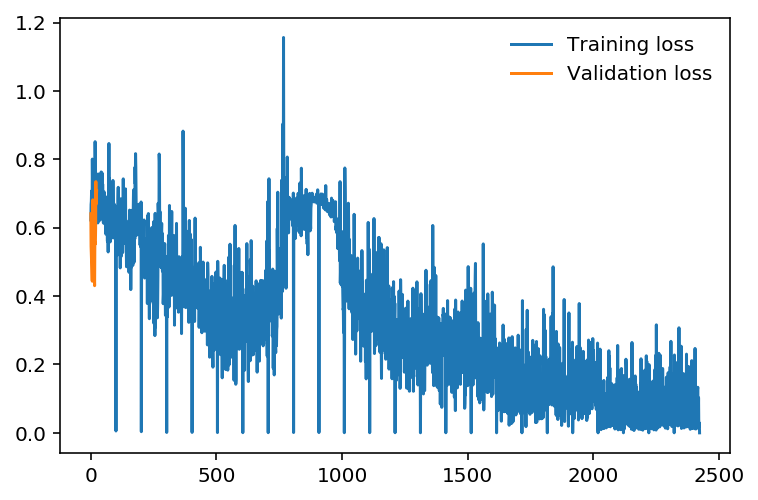

In [78]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt



plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)

In [ ]:
########### Saving my model

'''
## TODO: set you model hyperparameters
# define and print the net
n_hidden=512
n_layers=3

net = CharRNN(chars, n_hidden, n_layers)

##parameters presrve within the model
self.drop_prob = drop_prob
self.n_layers = n_layers
self.n_hidden = n_hidden
self.lr = lr
        
self.chars = tokens
self.int2char = dict(enumerate(self.chars))
self.char2int = {ch: ii for ii, ch in self.int2char.items()}
        
# change the name, for saving multiple files
model_name = 'rnn_x_epoch.net'

checkpoint = {'n_hidden': net.n_hidden,
              'n_layers': net.n_layers,
              'state_dict': net.state_dict(),
              'tokens': net.chars}

with open(model_name, 'wb') as f:
    torch.save(checkpoint, f)

# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int) + 1
output_size = 1
embedding_dim = 400
hidden_dim = 300
n_layers = 3

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

#parameters presrve within the model
self.output_size = output_size
self.n_layers = n_layers
self.hidden_dim = hidden_dim
self.embedding_dim=embedding_dim
self.vocab_size=vocab_size


# change the name, for saving multiple files
model_name = 'sentiment.net'

checkpoint = {'hidden_dim': net.hidden_dim,
              'output_size':net.output_size,
              'vocab_size':net.vocab_size,
              'n_layers': net.n_layers,
              'embedding_dim':net.embedding_dim,
              'state_dict': net.state_dict()
             }

with open(model_name, 'wb') as f:
    torch.save(checkpoint, f)

'''

In [ ]:
'''
# Here we have loaded in a model that we saved before 

#structure of model is:
#net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

import torch
with open('sentiment.net', 'rb') as f:
    checkpoint = torch.load(f,map_location='cpu')
    
loaded = SentimentRNN(checkpoint['vocab_size'],
                      hidden_dim=checkpoint['hidden_dim'],
                      n_layers=checkpoint['n_layers'],
                      output_size=checkpoint['output_size'],
                      embedding_dim=checkpoint['embedding_dim'])
                      
loaded.load_state_dict(checkpoint['state_dict'])
'''

---
## Testing

There are a few ways to test your network.

* **Test data performance:** First, we'll see how our trained model performs on all of our defined test_data, above. We'll calculate the average loss and accuracy over the test data.

* **Inference on user-generated data:** Second, we'll see if we can input just one example review at a time (without a label), and see what the trained model predicts. Looking at new, user input data like this, and predicting an output label, is called **inference**.

In [65]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

NameError: name 'net' is not defined

In [100]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


In [101]:
# Here we have loaded in a model that we saved before 

#structure of model is:
#net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

import torch
#device = torch.device("cuda")
with open('sentiment_analysis1.pt', 'rb') as f:
    if(train_on_gpu):
        checkpoint = torch.load(f) #,map_location=device)
    else:
        checkpoint = torch.load(f,map_location='cpu')
        #torch.load(f,map_location='cpu')
    
loaded = SentimentRNN(vocab_size=checkpoint['vocab_size'],
                      hidden_dim=checkpoint['hidden_dim'],
                      n_layers=checkpoint['n_layers'],
                      output_size=checkpoint['output_size'],
                      embedding_dim=checkpoint['embedding_dim'])
                      
loaded.load_state_dict(checkpoint['state_dict'])

if(train_on_gpu):
    loaded.cuda()

In [102]:
######## FINDING THR TOTAL NUMBER OF PARAMETERS USED IN OUR MODEL

pytorch_total_params = sum(p.numel() for p in loaded.parameters())
print(pytorch_total_params)

34174891


In [103]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(loaded.parameters(), lr=lr)

batch_size=50

In [104]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = loaded.init_hidden(batch_size)

loaded.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    output, h = loaded(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.418
Test accuracy: 0.816


In [37]:
a=torch.Tensor([0.4,0.4555,0.49,0.5,0.501,0.75,0.9])
print(a.round())

tensor([ 0.,  0.,  0.,  0.,  1.,  1.,  1.])


### Inference on a test review

You can change this test_review to any text that you want. Read it and think: is it pos or neg? Then see if your model predicts correctly!
    
> **Exercise:** Write a `predict` function that takes in a trained net, a plain text_review, and a sequence length, and prints out a custom statement for a positive or negative review!
* You can use any functions that you've already defined or define any helper functions you want to complete `predict`, but it should just take in a trained net, a text review, and a sequence length.


In [105]:
############# PREPROCESSING THE DATA

from string import punctuation

def tokenize_review(test_review):
    test_review = test_review.lower() # lowercase
    # get rid of punctuation
    test_text = ''.join([c for c in test_review if c not in punctuation])

    # splitting by spaces
    test_words = test_text.split()

    # tokens
    test_ints = []
    test_ints.append([vocab_to_int[word] for word in test_words])

    return test_ints

In [106]:
def predict(net, test_review, sequence_length=200):
    
    ''' Prints out whether a give review is predicted to be 
        positive or negative in sentiment, using a trained model.
        
        params:
        net - A trained net 
        test_review - a review made of normal text and punctuation
        sequence_length - the padded length of a review
    '''
    
    
    # print custom response based on whether test_review is pos/neg
    
    net.eval()

    # tokenize review
    test_ints = tokenize_review(test_review)

    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)

    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)

    batch_size = feature_tensor.size(0)

    # initialize hidden state
    h = net.init_hidden(batch_size)

    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()

    # get the output from the model
    output, h = loaded(feature_tensor, h)

    # convert output probabilities to predicted class (0 or 1)
    predpercent=output.squeeze()
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))

    # print custom response
    if(pred.item()==1):
        print("Positive review detected!")
    else:
        print("Negative review detected.")

In [122]:
# positive test review
test_review_pos = 'This movie had the best acting and the dialogue was so good. I loved it.'

# negative test review
test_review_neg = 'The worst movie I have seen; acting was terrible and I want my money back. This movie had bad acting and the dialogue was slow.'

test_1="you are not good"
test_2="you are so not good"
test_3="what a waste of money"
test_4="you are good , you are not bad !"

In [123]:
# call function
# try negative and positive reviews!
seq_length=200
predict(loaded, test_review_neg, seq_length)
predict(loaded, test_review_pos, seq_length)
predict(loaded, test_1, seq_length)
predict(loaded, test_2, seq_length)
predict(loaded, test_3, seq_length)
predict(loaded, test_4, seq_length)

Prediction value, pre-rounding: 0.008569
Negative review detected.
Prediction value, pre-rounding: 0.972061
Positive review detected!
Prediction value, pre-rounding: 0.476821
Negative review detected.
Prediction value, pre-rounding: 0.162593
Negative review detected.
Prediction value, pre-rounding: 0.016870
Negative review detected.
Prediction value, pre-rounding: 0.090581
Negative review detected.


In [130]:
####### INFERENCE SET BELOW
test_rev="the movie sucks"

seq_length=200
predict(loaded, test_rev, seq_length)



Prediction value, pre-rounding: 0.108136
Negative review detected.


### Try out test_reviews of your own!

Now that you have a trained model and a predict function, you can pass in _any_ kind of text and this model will predict whether the text has a positive or negative sentiment. Push this model to its limits and try to find what words it associates with positive or negative.

Later, you'll learn how to deploy a model like this to a production environment so that it can respond to any kind of user data put into a web app!

In [72]:
import torch
from torch import nn


word_to_ix = {"hello": 10, "world": 12}

embeds = nn.Embedding(13,10)  # 2 words in vocab, 5 dimensional embeddings

lookup_tensor = torch.tensor([word_to_ix["hello"]], dtype=torch.long)

print(lookup_tensor,' shape of it is : ',lookup_tensor.shape)
hello_embed = embeds(lookup_tensor)

print(hello_embed)


tensor([10])  shape of it is :  torch.Size([1])
tensor([[ 0.4618,  0.5285, -0.2405,  1.5443,  0.6933, -0.2768,  0.3256, -1.5862,
          0.7767, -0.8190]], grad_fn=<EmbeddingBackward>)


In [ ]:
import torch.nn as nn 

# vocab_size is the number of words in your train, val and test set
# vector_size is the dimension of the word vectors you are using
embed = nn.Embedding(vocab_size, vector_size)

# intialize the word vectors, pretrained_weights is a 
# numpy array of size (vocab_size, vector_size) and 
# pretrained_weights[i] retrieves the word vector of
# i-th word in the vocabulary
embed.weight.data.copy_(torch.fromnumpy(pretrained_weights))

# Then turn the word index into actual word vector
vocab = {"some": 0, "words": 1}
word_indexes = [vocab[w] for w in ["some", "words"]] 
word_vectors = embed(word_indexes)